In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') #ggplot object

In [3]:
# load your multi-class classification dataset
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

input_names = iris['feature_names']
print(input_names)


target_names = iris.get('target_names')
target_names = iris['target_names']
print(target_names)
for name in enumerate(target_names):
  print(name)

print(x.shape)
print(y.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(0, 'setosa')
(1, 'versicolor')
(2, 'virginica')
(150, 4)
(150,)


0 v
1 i
2 r
3 g
4 i
5 n
6 i
7 c
8 a


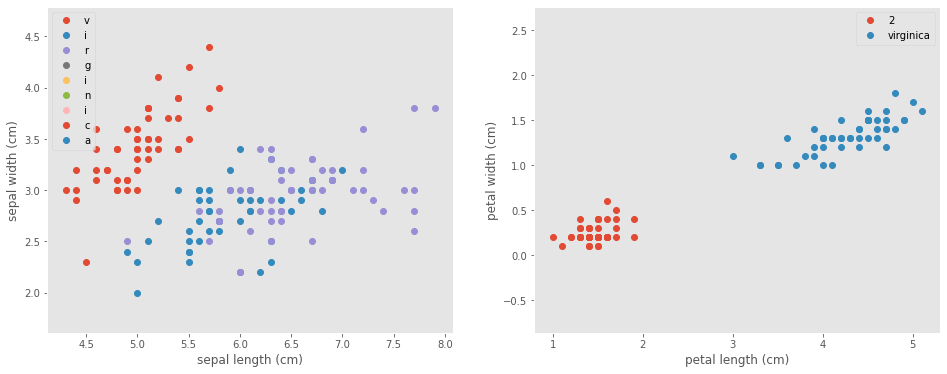

In [7]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(target_name):
    print(target, target_name)
    X_plot = x[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(input_names[0])
plt.ylabel(input_names[1])
plt.axis('equal')
plt.grid()
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(name):
    X_plot = x[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(input_names[2])
plt.ylabel(input_names[3])
plt.axis('equal')
plt.grid()
plt.legend();

In [8]:
# build my first model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# one hot encloding 
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
print(y[0,:])
print(y[50,:])
print(y[100,:])
print(y.shape)

# define min max scaler to scale your data from 0 to 1
scaler = MinMaxScaler()
# transform data
x_scaled = scaler.fit_transform(x)
print(x_scaled)

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_scaled)
print(x_scaled)

# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.5, random_state=2)

n_features = x.shape[1]
n_classes = y.shape[1]
print(n_features, n_classes)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Import Keras modules
from keras import models
from keras import layers

# Create the network
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(n_features,)))
model.add(layers.Dense(n_classes, activation='softmax'))

# Compile the network
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

#try: optimizer='adam', loss='sparse_categorical_crossentropy'

# Fit the neural network
model.fit(x_train, y_train, epochs=20, batch_size=40, verbose=1, validation_data=(x_test, y_test))

# Get the accuracy of test data set
test_loss, test_acc = model.evaluate(x_test, y_test,  verbose = 1)

# Print the test accuracy
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)